In [1]:
import pandas as pd

In [2]:
# genome_scores = pd.read_csv('./genome-scores.csv')
# genome_tags = pd.read_csv('./genome-tags.csv')
# links = pd.read_csv('./links.csv')
# movies = pd.read_csv('./movies.csv')
# ratings = pd.read_csv('./ratings.csv')
# tags = pd.read_csv('./tags.csv')
data = pd.read_csv('./GroupLensData_clean.csv')
data

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres,Year
0,14,58559,5.0,1311530004,Atmospheric,1311530439,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2008.0
1,14,58559,5.0,1311530004,Batman,1311530391,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2008.0
2,14,58559,5.0,1311530004,comic book,1311530398,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2008.0
3,14,58559,5.0,1311530004,dark,1311530428,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2008.0
4,14,58559,5.0,1311530004,Heath Ledger,1311530404,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2008.0
...,...,...,...,...,...,...,...,...,...
1124064,330923,141854,1.5,1503554287,rape,1503554299,Among Friends (2012),Comedy|Horror,2012.0
1124065,330923,162536,0.5,1507547622,gay romance,1507547612,Truth (2013),Thriller,2013.0
1124066,330923,162536,0.5,1507547622,lgbt,1507547610,Truth (2013),Thriller,2013.0
1124067,330923,162536,0.5,1507547622,political correct,1507547616,Truth (2013),Thriller,2013.0


In [3]:
clean = data.drop(columns=['timestamp_x','timestamp_y','userId','movieId','tag'])

In [4]:
sorted_df =         clean.sort_values('title')
stats_df  =         sorted_df.groupby('title')['rating'].agg(['mean', 'count'])
stats_df.columns =  ['average_rating', 'rating_count']
stats_df.reset_index(inplace=True)
sorted_df =         pd.merge(sorted_df, stats_df, on='title')
sorted_df.drop_duplicates(subset='title', inplace=True)
sorted_df =         sorted_df[['rating', 'title', 'genres', 'Year', 'average_rating', 'rating_count']]
sorted_df =         sorted_df.drop(columns="rating")
sorted_df =         sorted_df.round({'average_rating': 2})
sorted_df.sort_values('rating_count', ascending=False)
sorted_df

,title,genres,Year,average_rating,rating_count
0,(2019),Drama|Thriller,2019.0,2.50,8
8,"""Sr."" (2022)",Documentary,2022.0,4.50,1
9,#1 Cheerleader Camp (2010),Comedy|Drama,2010.0,2.00,10
19,#Alive (2020),Action|Horror|Thriller,2020.0,3.53,44
63,#FollowMe (2019),Horror|Thriller,2019.0,4.43,7
...,...,...,...,...,...
1124052,Я худею (2018),Children|Comedy,2018.0,3.29,7
1124059,キサラギ (2007),Comedy|Mystery,2007.0,4.50,2
1124061,チェブラーシカ (2010),Animation|Children,2010.0,3.00,4
1124065,貞子3D (2012),Horror,2012.0,1.50,3


In [5]:
data2= pd.read_csv('./data_for_ml.csv')
data2

,title,Year,average_rating,rating_count,Animation,Adventure,Mystery,Drama,Action,Romance,...,Comedy,Thriller,Crime,Documentary,Children,Sci-Fi,IMAX,Western,Fantasy,Horror
0,Inception (2010),2010.0,4.44,8817,0,0,1,1,1,0,...,0,1,1,0,0,1,1,0,0,0
1,Eternal Sunshine of the Spotless Mind (2004),2004.0,4.51,4507,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,"Dark Knight, The (2008)",2008.0,4.38,3598,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
3,"Prestige, The (2006)",2006.0,4.34,3598,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,"Lord of the Rings: The Fellowship of the Ring,...",2001.0,4.45,3372,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,Horror Stories (2012),2012.0,4.00,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11231,Hot Gimmick: Girl Meets Boy (2019),2019.0,1.50,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11232,Hosts (2020),2020.0,5.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11233,Totally Awesome (2006),2006.0,1.00,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
data3 = pd.get_dummies(data2, dtype=int)
data3

,Year,average_rating,rating_count,Animation,Adventure,Mystery,Drama,Action,Romance,Musical,...,title_Zombi Child (2019),title_Zombie Town (2007),title_Zombieland: Double Tap (2019),title_Zombies Anonymous: Last Rites of the Dead (2006),title_[REC] (2007),title_[REC] 4: Apocalypse (2014),title_a/k/a Tommy Chong (2005),title_loudQUIETloud: A Film About the Pixies (2006),title_xXx: Return of Xander Cage (2017),title_xXx: State of the Union (2005)
0,2010.0,4.44,8817,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2004.0,4.51,4507,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,4.38,3598,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006.0,4.34,3598,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001.0,4.45,3372,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,2012.0,4.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11231,2019.0,1.50,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11232,2020.0,5.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11233,2006.0,1.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.cluster import KMeans

k = range(1,21)

inertia = [ KMeans(i,random_state=42).fit(data3).inertia_ for i in k ]

<Axes: >

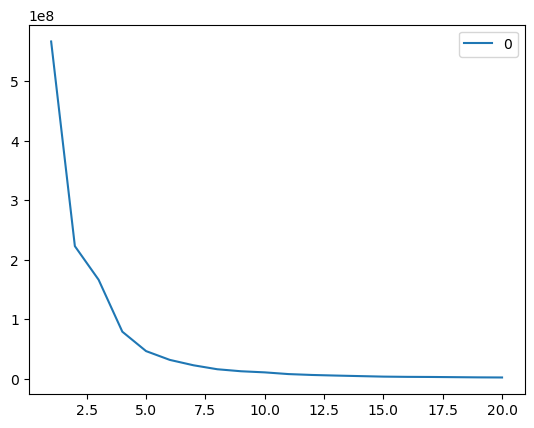

In [8]:
pd.DataFrame(inertia,k).plot()
    

In [9]:
model = KMeans(n_clusters=5)
model.fit(data3)
data_cluster = model.predict(data3)
data_cluster

array([4, 1, 1, ..., 0, 0, 0])

In [10]:
data4 = data2.copy()
data4['Movie_group'] = data_cluster
data4.head()

,title,Year,average_rating,rating_count,Animation,Adventure,Mystery,Drama,Action,Romance,...,Thriller,Crime,Documentary,Children,Sci-Fi,IMAX,Western,Fantasy,Horror,Movie_group
0,Inception (2010),2010.0,4.44,8817,0,0,1,1,1,0,...,1,1,0,0,1,1,0,0,0,4
1,Eternal Sunshine of the Spotless Mind (2004),2004.0,4.51,4507,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,"Dark Knight, The (2008)",2008.0,4.38,3598,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,"Prestige, The (2006)",2006.0,4.34,3598,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,"Lord of the Rings: The Fellowship of the Ring,...",2001.0,4.45,3372,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [12]:
data4.groupby('Movie_group').size()

Movie_group
0    10491
1       47
2      539
3      157
4        1
dtype: int64

In [13]:
data4[['title','Year','Movie_group']].head()

,title,Year,Movie_group
0,Inception (2010),2010.0,4
1,Eternal Sunshine of the Spotless Mind (2004),2004.0,1
2,"Dark Knight, The (2008)",2008.0,1
3,"Prestige, The (2006)",2006.0,1
4,"Lord of the Rings: The Fellowship of the Ring,...",2001.0,1


In [ ]:
data4.groupby('Movie_group').sum().plot.scatter()